In [1]:
!nvidia-smi

Sat Oct 26 22:55:51 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Установка YOLO11 через Ultralytics

In [3]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.2/112.6 GB disk)


## Fine-tune YOLO11 на кастомном датасете

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="iFZGaJVqJ8m7sjJioKym")
project = rf.workspace("razmetka-dj4rc").project("razmetka-wogxf")
version = project.version(2)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to razmetka-2 in yolov11:: 100%|██████████| 12556/12556 [00:03<00:00, 3617.98it/s]


## Custom Training

In [5]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

/content
100% 18.4M/18.4M [00:00<00:00, 261MB/s]
Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/razmetka-2/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop

**NOTE:** Результаты обучения сохранены в `{HOME}/runs/detect/train/`

In [6]:
!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1729978146.cff133de11d9.2793.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


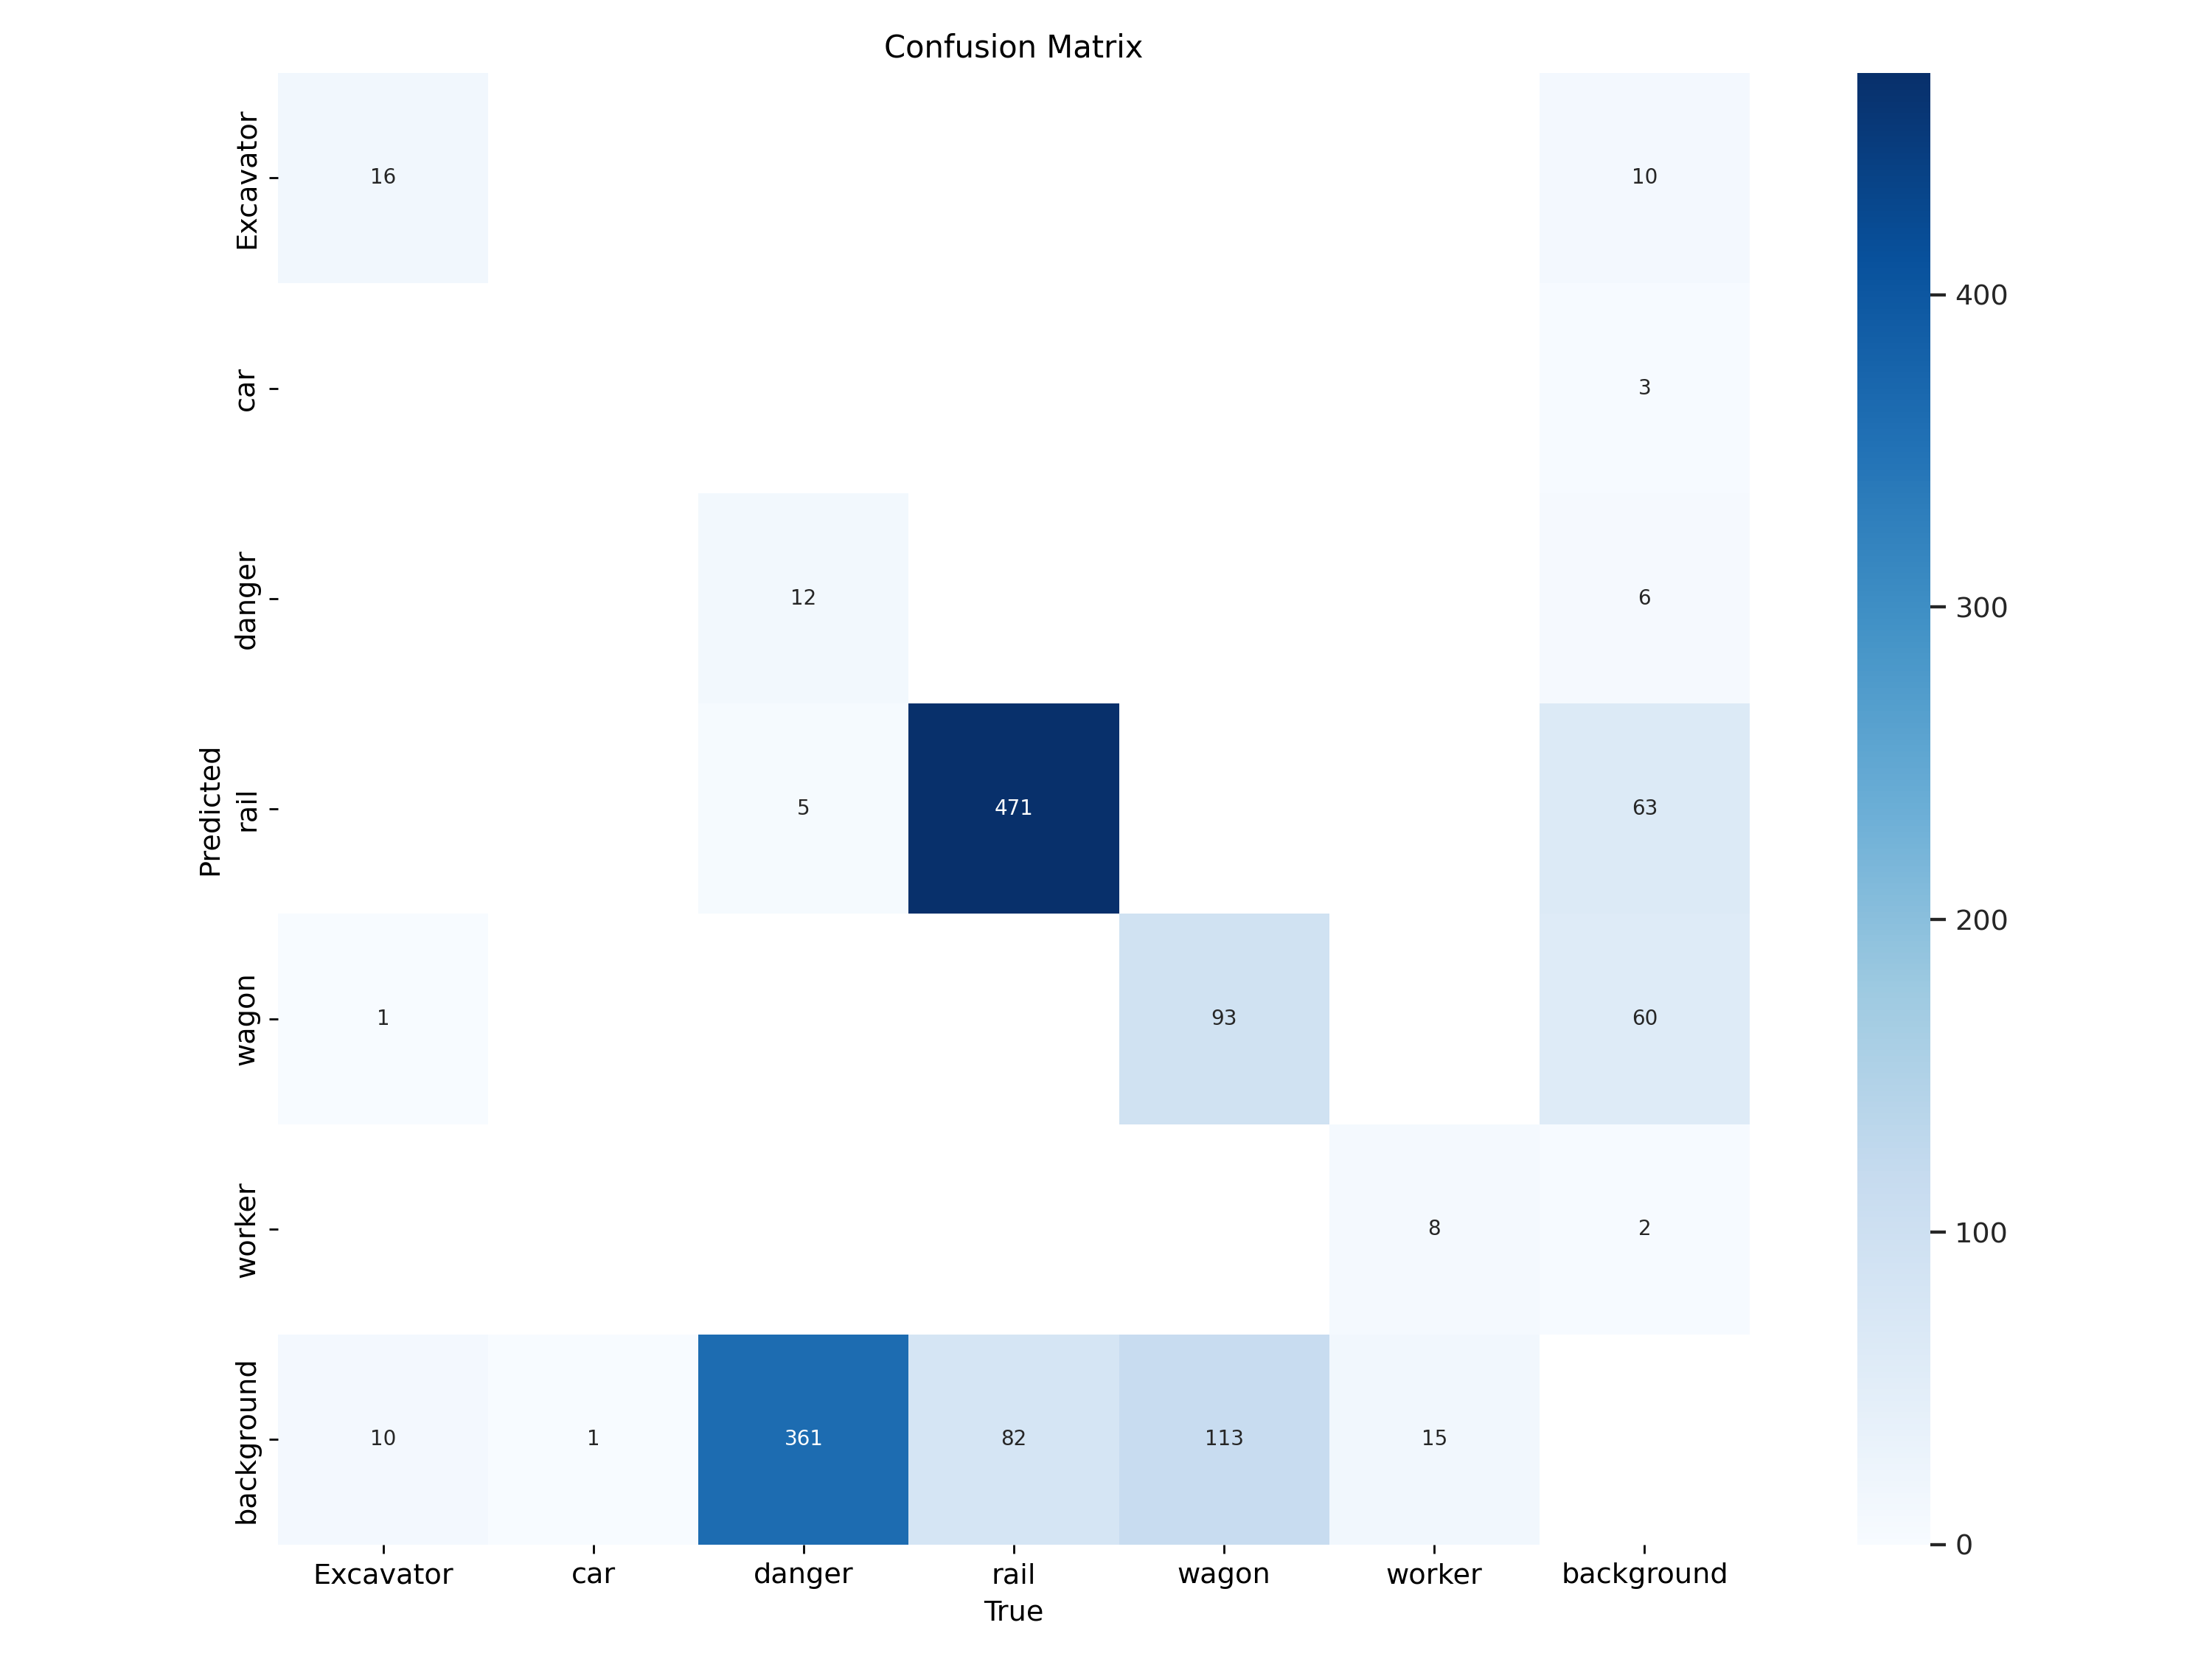

In [7]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

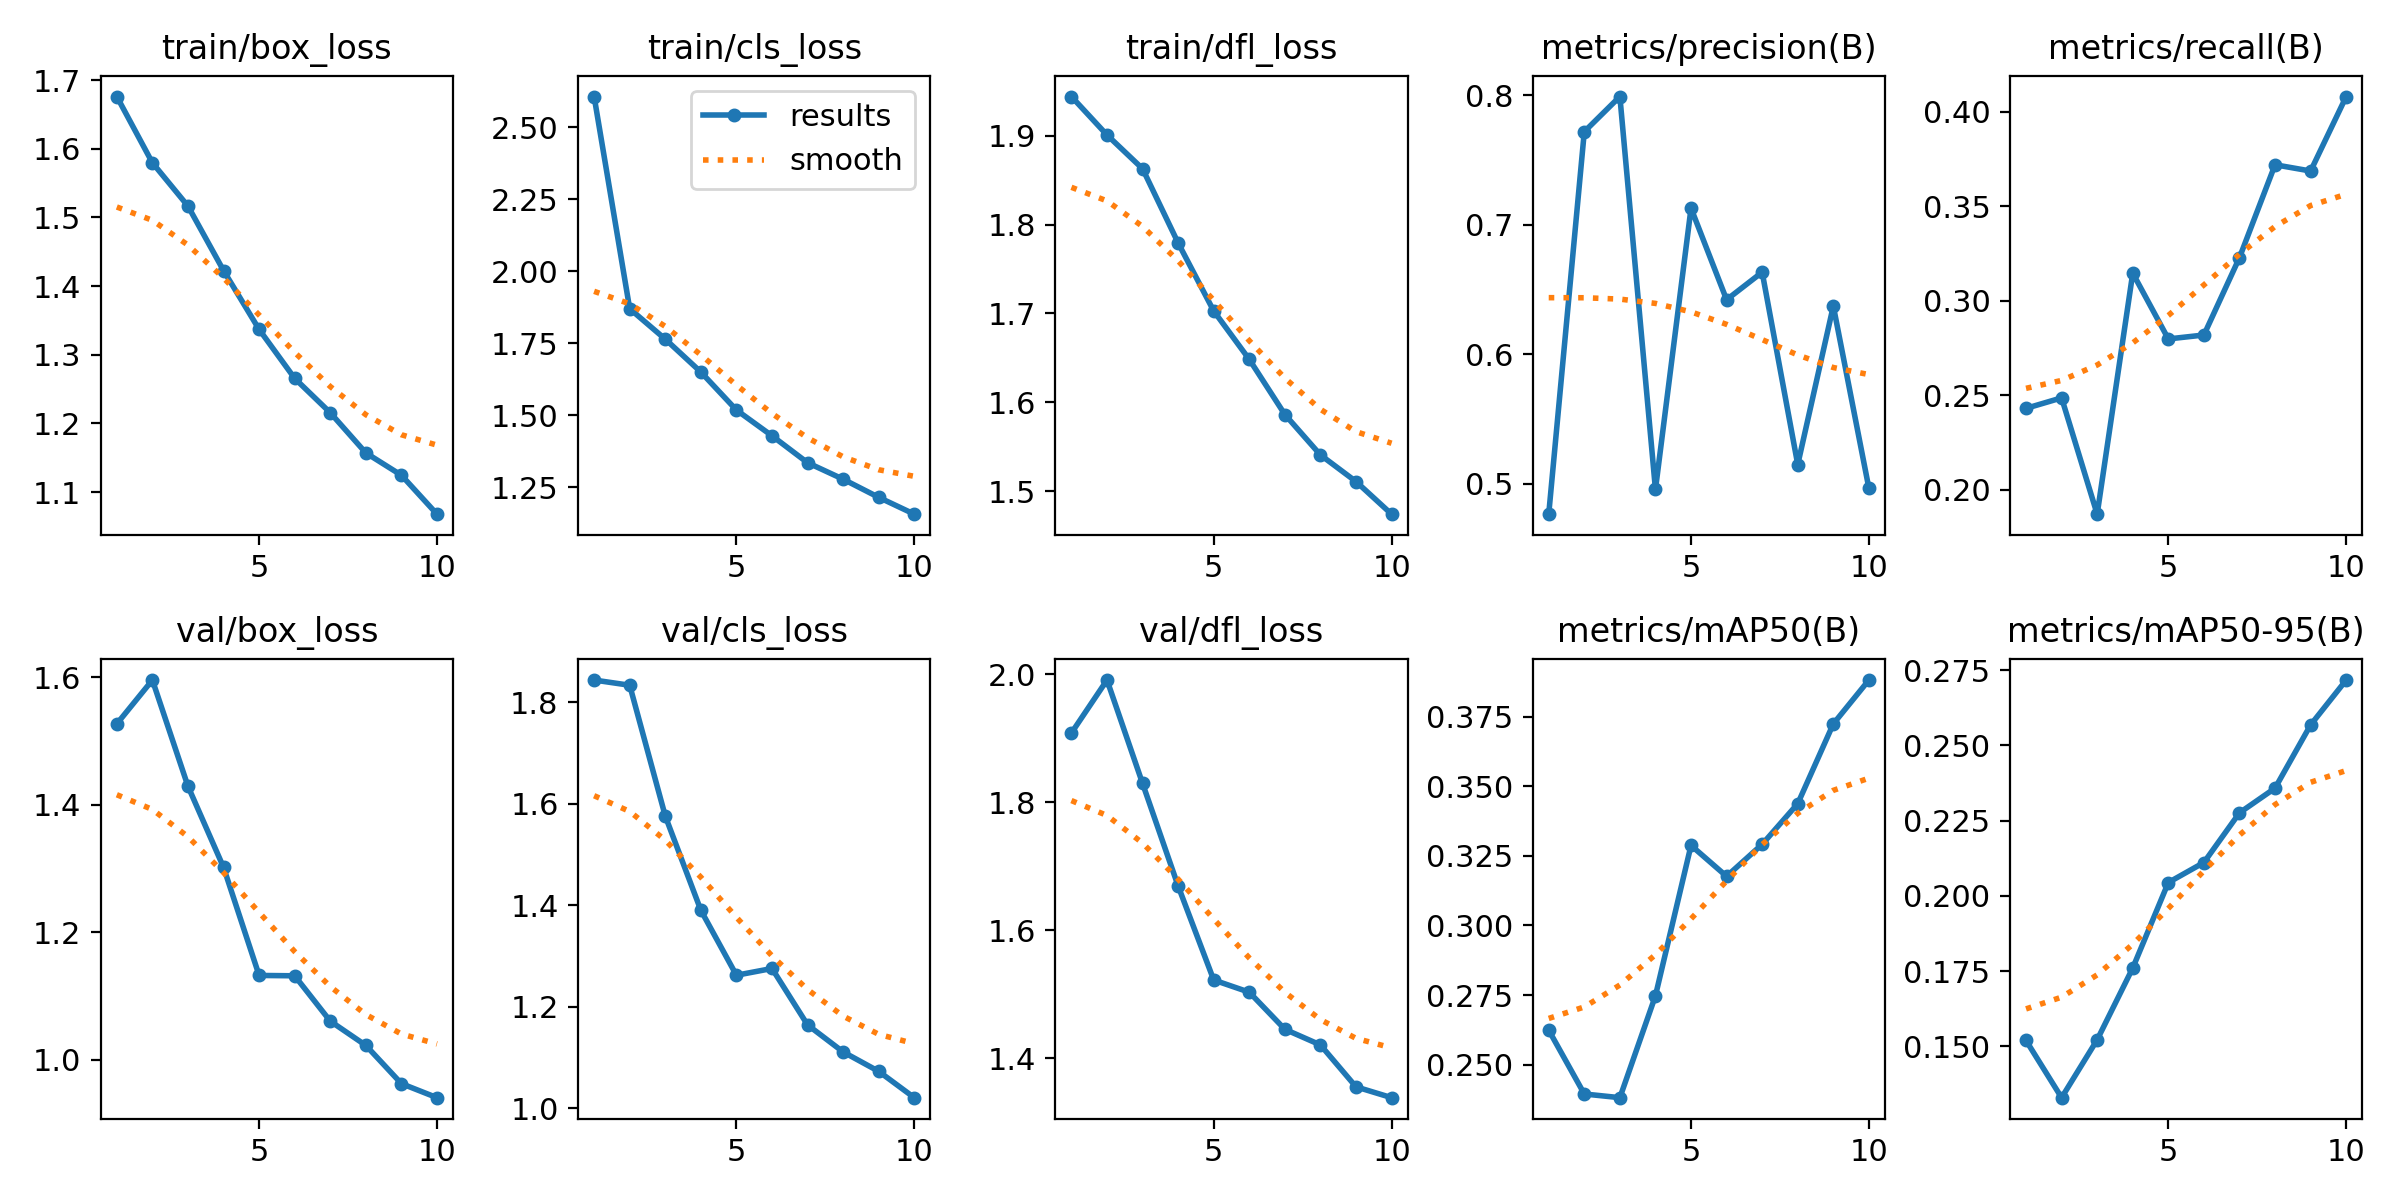

In [8]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

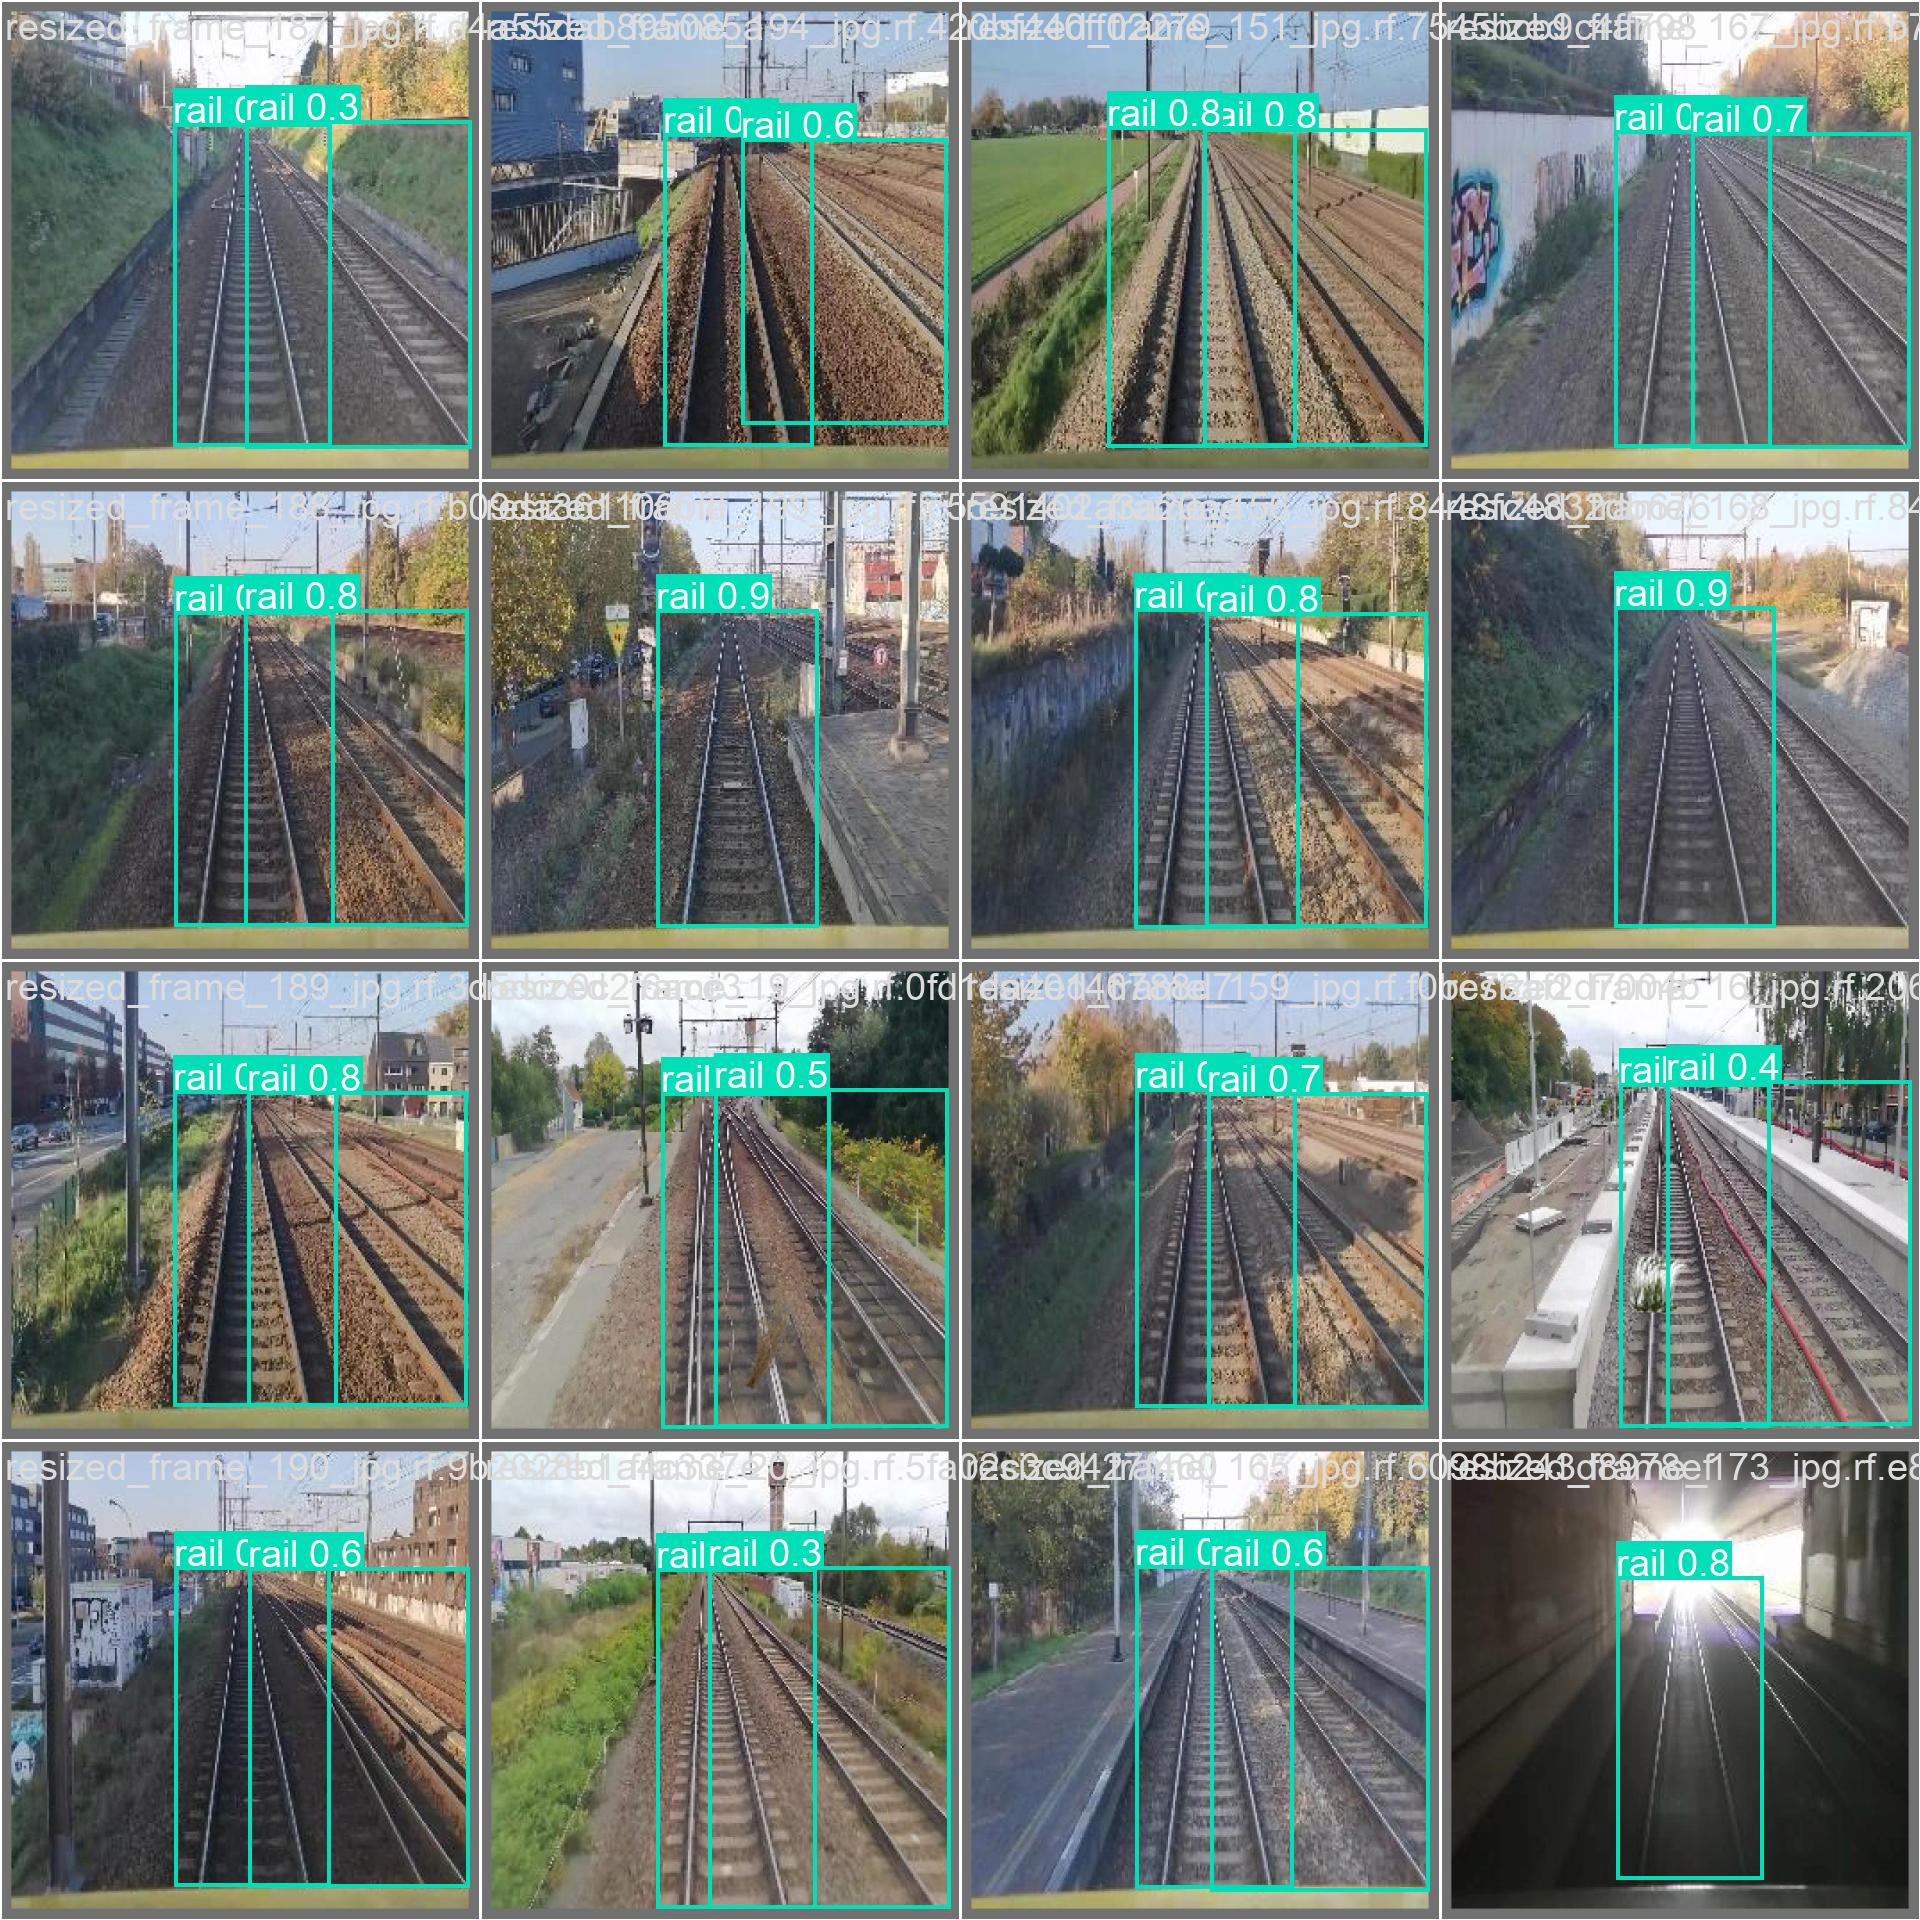

In [9]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Валидация fine-tuned модели

In [11]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,415,122 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/razmetka-3/valid/labels.cache... 473 images, 0 backgrounds, 0 corrupt: 100% 473/473 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 866, len(boxes) = 1188. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 30/30 [00:08<00:00,  3.54it/s]
                   all        473       1188      0.496      0.408      0.388      0.272
             Excavator         17         27      0.496      0.619      0.455      0.328
                   car          1          1          0          0     0.0553     0.0332
                danger        251        378

## Inference с кастомной моделью

In [13]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,415,122 parameters, 0 gradients, 21.3 GFLOPs

image 1/258 /content/razmetka-3/test/images/1-1-_jpg.rf.1c3f589a88f3b2b76d1f3ef5d4d630a3.jpg: 640x640 1 rail, 15.7ms
image 2/258 /content/razmetka-3/test/images/1-10-_jpg.rf.483139c701e073d4ce635ab159b38fe0.jpg: 640x640 2 rails, 15.6ms
image 3/258 /content/razmetka-3/test/images/1-6-_jpg.rf.8fed5af58538a514d3062ae25aae9182.jpg: 640x640 1 rail, 15.6ms
image 4/258 /content/razmetka-3/test/images/20241011110417643_d700c44db5524303970688d087e40afa_AC1418956_frame_74_jpg.rf.e17057b1a56376737c2e6e41ad5b71e2.jpg: 640x640 1 Excavator, 4 wagons, 1 worker, 15.6ms
image 5/258 /content/razmetka-3/test/images/20241011124106860_d700c44db5524303970688d087e40afa_AC1418956_frame_74_jpg.rf.299b234a24de7c479a6cd77358c320b3.jpg: 640x640 2 Excavators, 4 wagons, 1 worker, 15.6ms
image 6/258 /content/razmetka-3/test/images/20241011124304725_d70

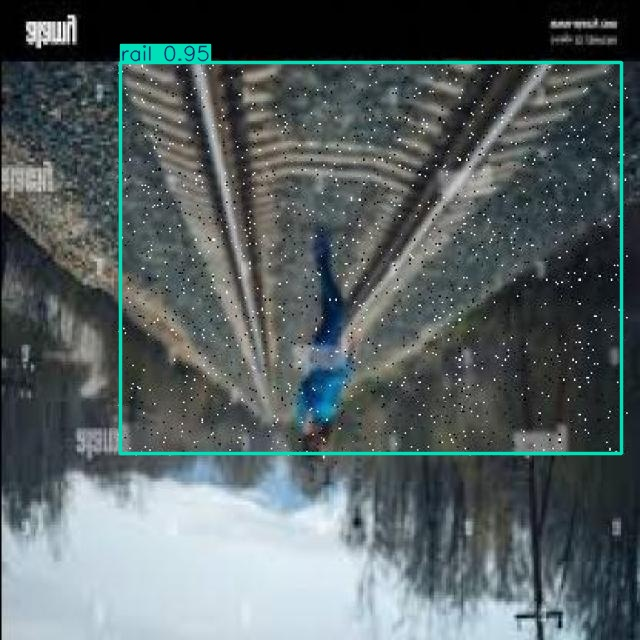

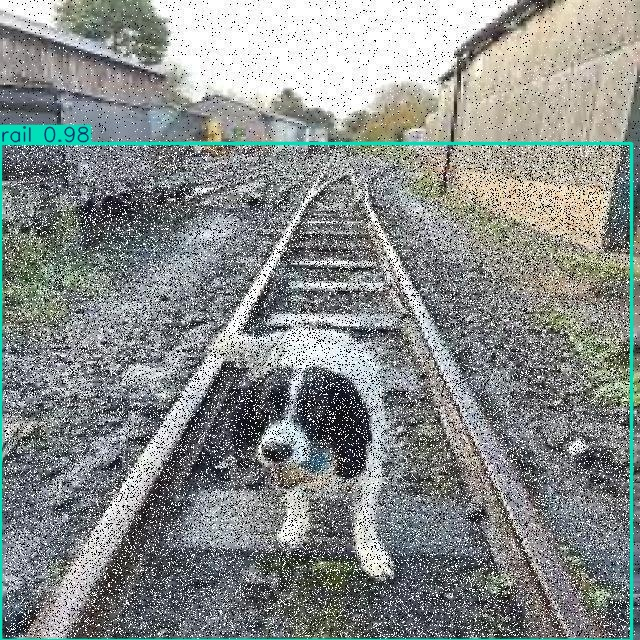

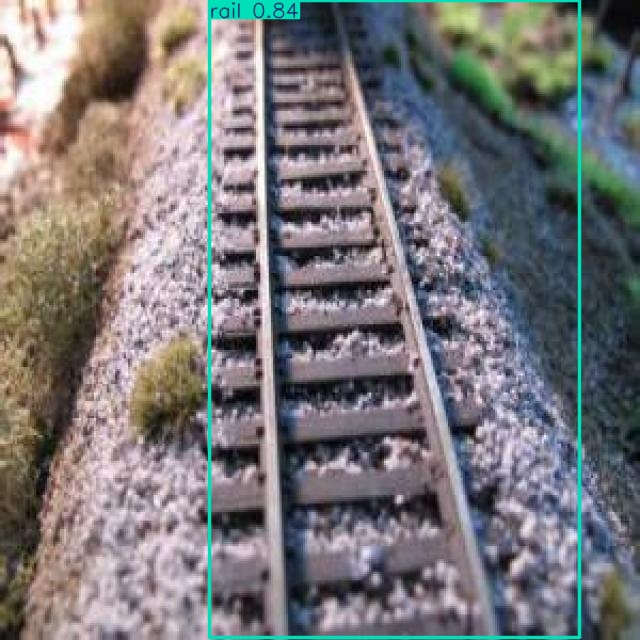

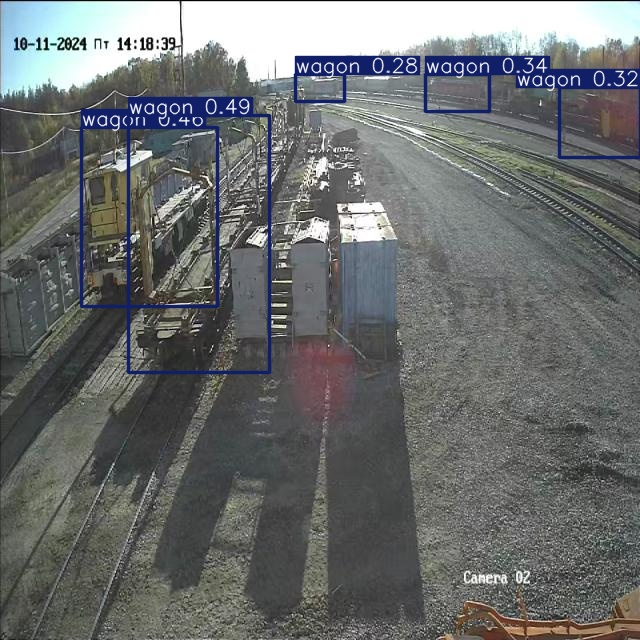

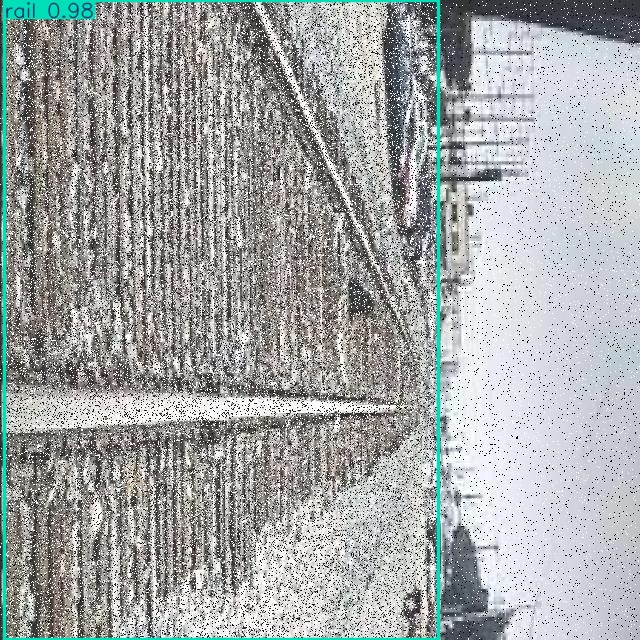

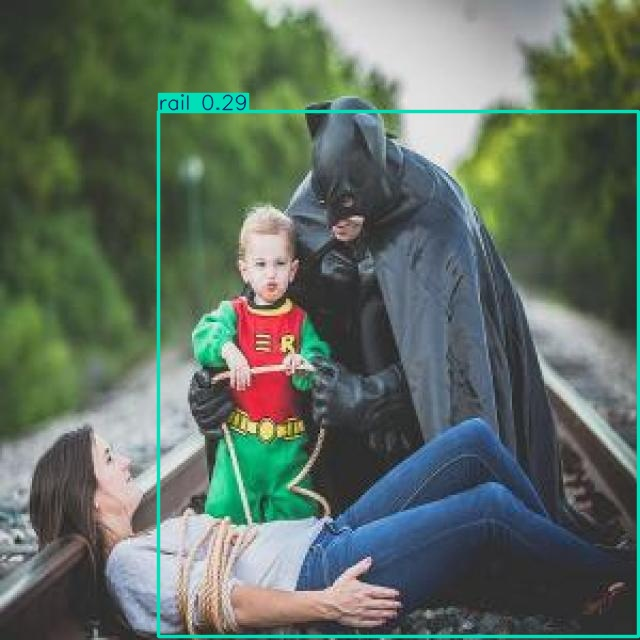

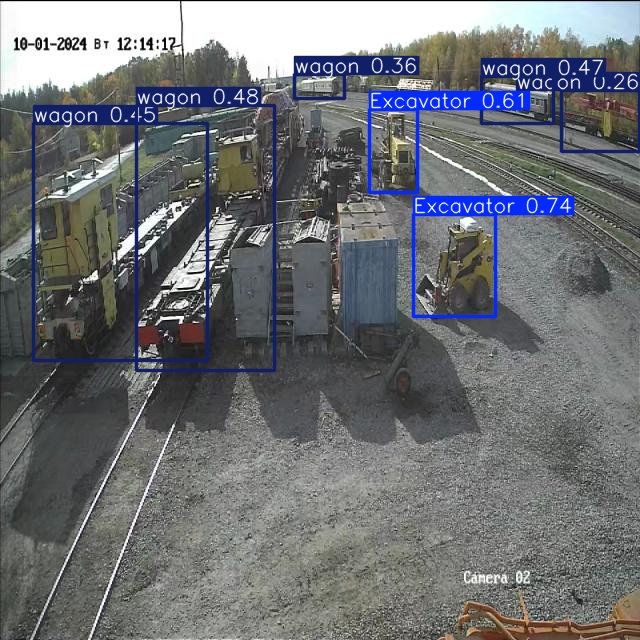

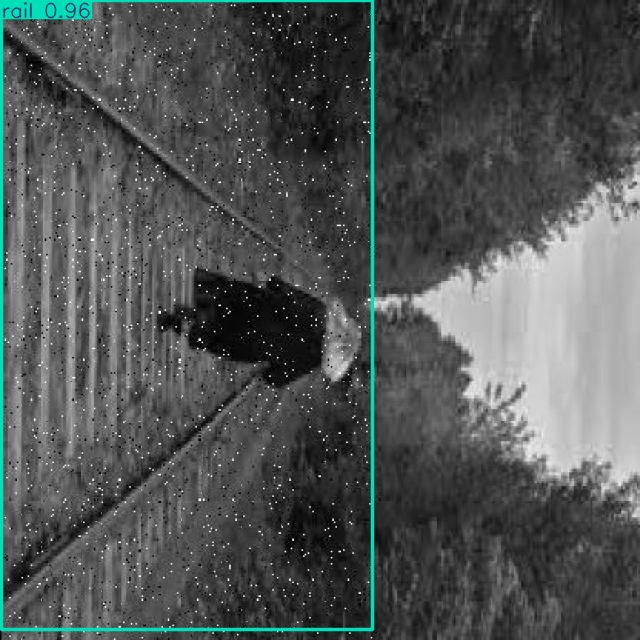

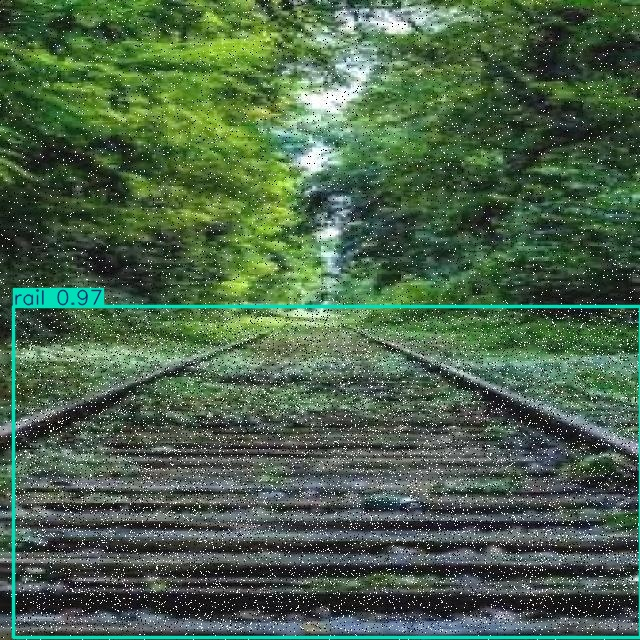

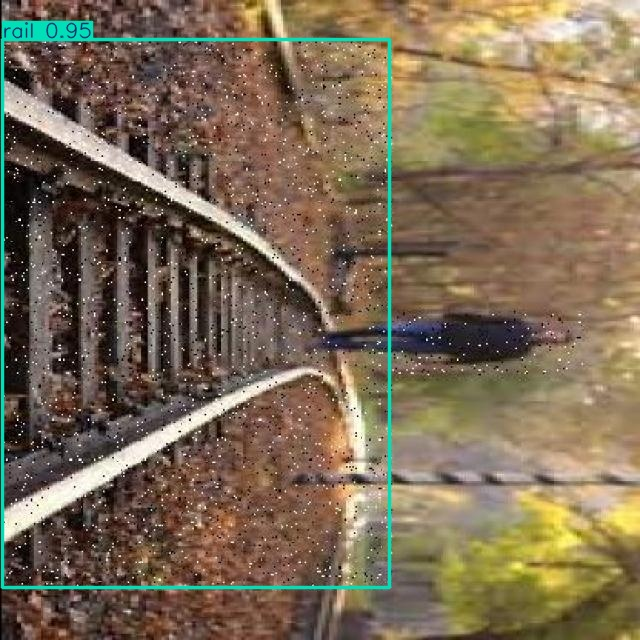

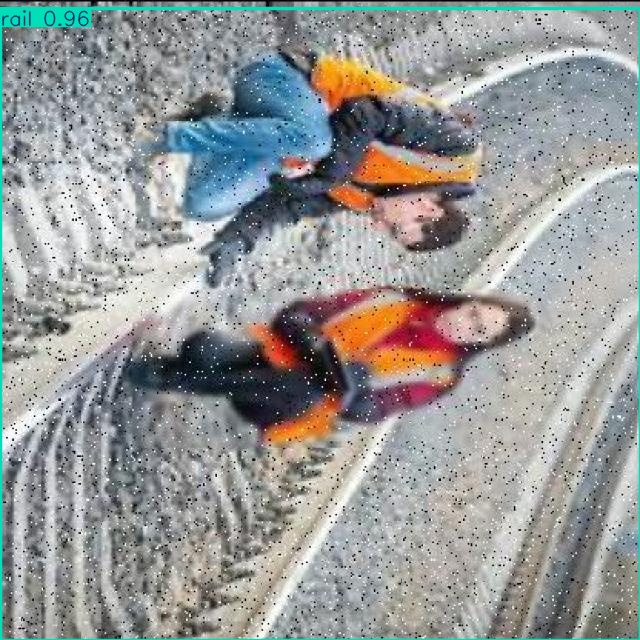

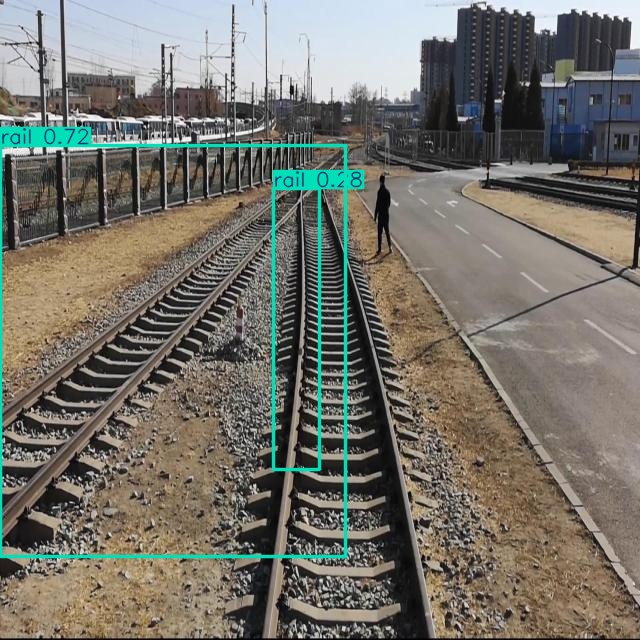

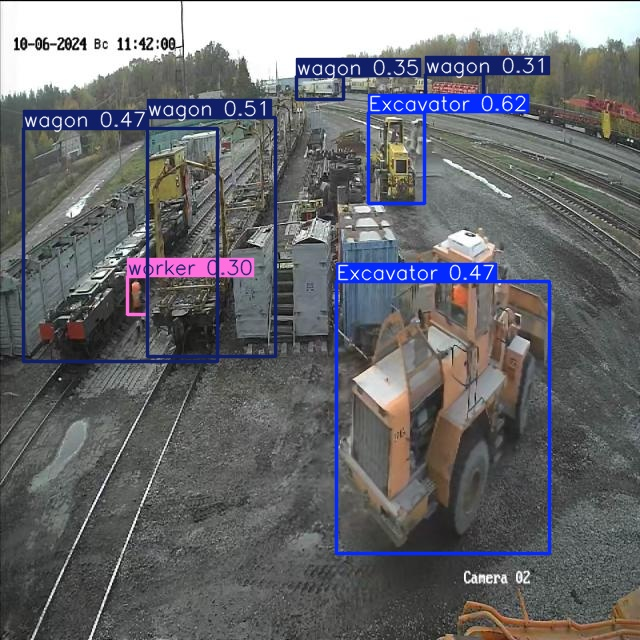

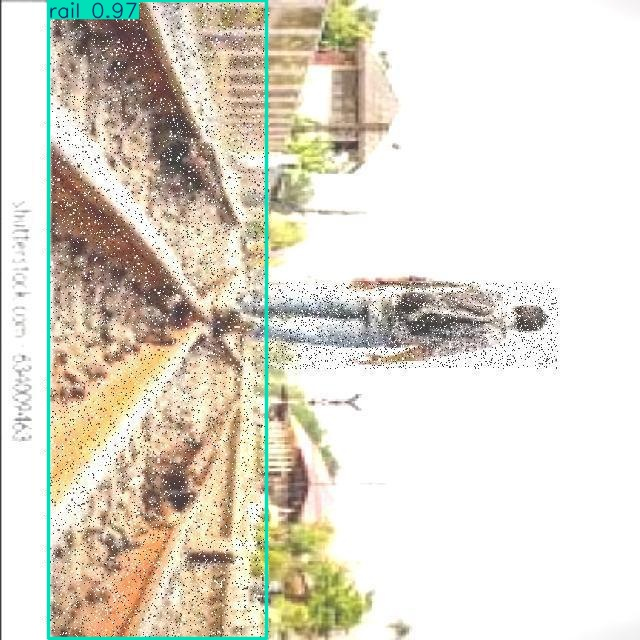

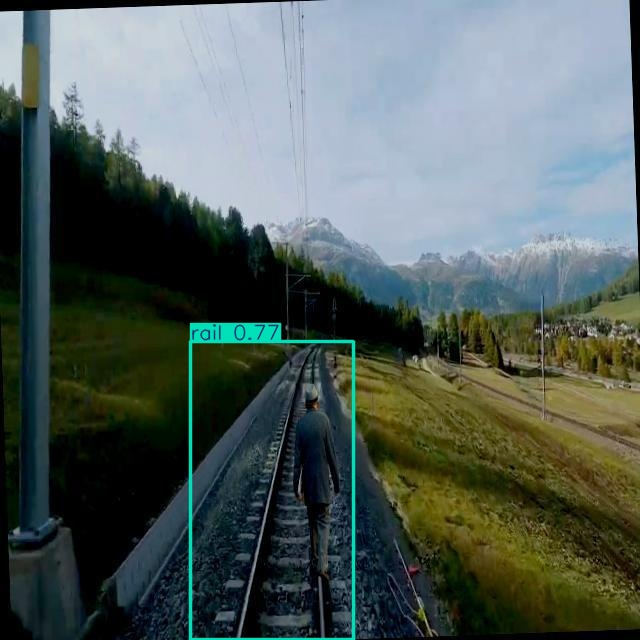

In [17]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:15]:
    display(IPyImage(filename=img, width=300))
    print("\n")

## Сохранение модели

In [ ]:
from ultralytics import YOLO
model = YOLO("/content/runs/detect/train/weights/best.pt")
model.export(format="onnx")

Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11s summary (fused): 238 layers, 9,415,122 parameters, 0 gradients, 21.3 GFLOPs

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 10, 8400) (18.3 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 289.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.4/140.4 kB 331.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.2/226.2 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 1.7 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 18.5s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command f

'/content/runs/detect/train/weights/best.onnx'